In [1]:
import numpy as np
import MixtureOptDesign
import itertools




In [2]:
import random

In [3]:
random.seed(124)

In [4]:
from MixtureOptDesign import generate_simplex_lattice_design, generate_initial_design

In [5]:
from MixtureOptDesign import neighborhood_func_1,neighborhood_func_2, vns

In [22]:
lattice_design = generate_simplex_lattice_design(3,25)


In [23]:
lattice_design.shape

(351, 3)

In [24]:
MixtureOptDesign.MNLVis.plot_ternary_design(lattice_design.T.reshape(3,1,351))

In [25]:
beta = MixtureOptDesign.generate_beta_params(7,3)


In [26]:
# set up initial optimality value
best_optimality_value = float('inf')

In [11]:
design = np.array([[[0.96, 0.16, 0.64, 0.52, 0.16, 0.96, 0.16, 0.52, 0.16, 0.64,
         0.36, 0.56, 0.16, 0.  , 0.16, 0.52],
        [0.32, 0.64, 0.  , 0.56, 0.52, 0.2 , 0.52, 0.36, 0.56, 0.36,
         0.32, 0.32, 0.36, 0.36, 0.2 , 0.2 ]],

       [[0.04, 0.36, 0.12, 0.  , 0.04, 0.04, 0.36, 0.  , 0.04, 0.12,
         0.56, 0.28, 0.04, 0.12, 0.04, 0.  ],
        [0.6 , 0.12, 0.12, 0.28, 0.  , 0.12, 0.  , 0.56, 0.28, 0.56,
         0.6 , 0.6 , 0.56, 0.56, 0.12, 0.12]],

       [[0.  , 0.48, 0.24, 0.48, 0.8 , 0.  , 0.48, 0.48, 0.8 , 0.24,
         0.08, 0.16, 0.8 , 0.88, 0.8 , 0.48],
        [0.08, 0.24, 0.88, 0.16, 0.48, 0.68, 0.48, 0.08, 0.16, 0.08,
         0.08, 0.08, 0.08, 0.08, 0.68, 0.68]]])

In [27]:


for iteration in range(10000):
    
    # set up flag variable
    success = False

    # loop until success is True
    while not success:
        try:
            # generate initial design
            initial_design, lattice_points, other_points = generate_initial_design(lattice_design)


            # calculate optimality value
            current_optimality_value = MixtureOptDesign.get_i_optimality_mnl(initial_design, 3, beta)
            
            # if no exception is raised, set success to True
            success = True
            
        except np.linalg.LinAlgError as e:
            print(f"Singular matrix: {e}")
        except ValueError:
            print("ValueError")
        except:
            print("Exception")
        
    # do something with i_opt_value if the code runs successfully
    if current_optimality_value < best_optimality_value and current_optimality_value >0 :
        
        best_optimality_value = current_optimality_value
        best_design = initial_design.copy()
        best_lattice_points = lattice_points.copy()
        best_other_points = other_points.copy()

Singular matrix: Singular matrix


In [28]:
best_optimality_value

0.8394564843887168

In [29]:
vns_desgin,vni_i_value = vns(best_design,best_other_points,beta)

Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!
Singular matrix!


In [30]:
vni_i_value

0.3972154667943063

In [16]:
beta_= np.array([-0.79482718, -0.19781423, -0.39415532,  0.14392659,  2.14268707, 0.9039211 ])

In [17]:
best_design_ = np.array([[[0.56, 1.  , 0.44, 0.  , 1.  , 0.44, 0.12, 0.56, 0.12, 0.12,
         0.44, 0.28, 0.12, 1.  , 0.  , 0.12],
        [0.52, 0.  , 0.  , 0.52, 0.44, 0.  , 0.  , 0.28, 0.44, 0.  ,
         0.  , 0.52, 0.52, 0.  , 0.28, 0.12]],

       [[0.32, 0.  , 0.  , 0.12, 0.  , 0.28, 0.76, 0.32, 0.44, 0.44,
         0.28, 0.32, 0.76, 0.  , 0.  , 0.76],
        [0.48, 0.12, 0.  , 0.48, 0.28, 0.12, 0.  , 0.32, 0.  , 0.  ,
         0.  , 0.48, 0.48, 0.  , 0.32, 0.44]],

       [[0.12, 0.  , 0.56, 0.88, 0.  , 0.28, 0.12, 0.12, 0.44, 0.44,
         0.28, 0.4 , 0.12, 0.  , 1.  , 0.12],
        [0.  , 0.88, 1.  , 0.  , 0.28, 0.88, 1.  , 0.4 , 0.56, 1.  ,
         1.  , 0.  , 0.  , 1.  , 0.4 , 0.44]]])

In [18]:
best_lattice_points_= np.array([[1.  , 0.  , 0.  ],
       [0.12, 0.76, 0.12],
       [0.56, 0.32, 0.12],
       [0.44, 0.28, 0.28],
       [0.12, 0.44, 0.44],
       [0.44, 0.  , 0.56],
       [0.  , 0.  , 1.  ],
       [0.  , 0.12, 0.88],
       [0.28, 0.32, 0.4 ],
       [0.52, 0.48, 0.  ]])

In [19]:
def unique_rows(design:np.ndarray)->np.ndarray:
    q,j,s = design.shape
    arr = design.T.reshape(j*s,q)
    return np.unique(arr,axis=0)

In [20]:
unique_rows(vns_desgin)

array([[0.        , 0.        , 1.        ],
       [0.        , 0.5       , 0.5       ],
       [0.        , 1.        , 0.        ],
       [0.33333333, 0.16666667, 0.5       ],
       [0.33333333, 0.5       , 0.16666667],
       [0.5       , 0.5       , 0.        ],
       [0.66666667, 0.        , 0.33333333],
       [1.        , 0.        , 0.        ]])

In [21]:
MixtureOptDesign.get_i_optimality_mnl(design2, 3, beta)

NameError: name 'design2' is not defined

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(vns_desgin)

In [ ]:
design1,i_value = neighborhood_func_2(best_other_points,best_design,beta)

In [ ]:
i_value

0.48983300800200524

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(design1)

In [ ]:
design2, i_value_2 = neighborhood_func_1(best_other_points,design1,beta)

Singular matrix!


In [ ]:
i_value_2

0.37203321220345087

In [ ]:
# Get indices for all design points
design_points_indices = [np.where(np.all(design == dp.reshape(3,1,1), axis=0)) for dp in design_points]

# Iterate through all design points
for indices in design_points_indices:
    try:
        # Create all candidate designs at once
        candidate_designs = np.tile(design, (len(other_points), 1, 1))
        candidate_designs[:, indices[0], indices[1]] = np.array(other_points)[:, np.newaxis, :]

        # Find the index of the candidate design with the lowest i_optimality_mnl value
        i_new_values = MixtureOptDesign.get_i_optimality_mnl(candidate_designs, 3, beta)
        i_opt_index = np.argmin(i_new_values)

        # Check if the candidate design improves i_optimality_mnl
        if i_opt_value >= i_new_values[i_opt_index]:
            design = candidate_designs[i_opt_index]
            i_opt_value = i_new_values[i_opt_index]
    except np.linalg.LinAlgError:
        print("Singular matrix!")
        continue


In [ ]:
for k in range(100):
    for i in range(len(design_points)):
        # get the indices of the element with value of the design point
        indices = np.where(np.all(design == design_points[i].reshape(3,1,1),axis=0))
        try:
            for j in range(len(other_points)):
            # replace the values with other points
                canditate_design = design.copy()
                canditate_design[:,indices[0],indices[1]] = other_points[0].reshape(3,1)
                i_new_value = MixtureOptDesign.get_i_optimality_mnl(canditate_design,3,beta)
                if i_opt_value >= i_new_value:
                    design = canditate_design
                    i_opt_value = i_new_value
        except np.linalg.LinAlgError:
            print("Singular matrix!")
            continue

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(design)

In [ ]:
i_opt_value

4.953780236880187

In [ ]:
for i in range(len(design_points)):
    # find the rows where the array is equal to the design point
    rows = np.where((design == design_points[i]).all(axis=2))
    
    for j in range(len(other_points)):
    # replace the values in those rows with other points
        canditate_design = design.copy()
        canditate_design[rows] = other_points[j]
        i_new_value = MixtureOptDesign.get_i_optimality_mnl(canditate_design,3,beta)
        if i_opt_value >= i_new_value:
            design = canditate_design
            i_opt_value = i_new_value
            
        
    

LinAlgError: Singular matrix

In [ ]:
beta = MixtureOptDesign.generate_beta_params(7,3)

In [ ]:
beta

array([ 1.04405885,  2.05147293,  2.4622598 ,  0.23293594,  0.52561883,
       -0.40026673])

In [ ]:
design = MixtureOptDesign.get_random_initial_design_mnl(3,2,16,seed=124)
design1 = MixtureOptDesign.get_random_initial_design_mnl(3,3,40,seed=124)
design2 = MixtureOptDesign.get_random_initial_design_mnl(3,4,40,seed=124)
design3 = MixtureOptDesign.get_random_initial_design_mnl(3,5,40,seed=124)

In [ ]:
design_2d =np.vstack([dim.reshape(-1, order='F') for dim in design]).T

In [ ]:
a = np.sum(design_2d,axis=1)

In [ ]:
design_2d_ =design.reshape(3,80).T

In [ ]:
b = np.sum(design_2d_,axis=1)

In [ ]:
design_2d.shape

(80, 3)

In [ ]:
mask = np.invert(a==b)

In [ ]:
a==b

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
        True, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True, False,  True, False,  True, False,  True,  True])

In [ ]:
design_2d_[mask].shape

(30, 3)

In [ ]:
design_2d[mask]

array([[0.56239687, 0.02870188, 0.40890125],
       [0.43749406, 0.20577502, 0.35673092],
       [0.34895224, 0.50167915, 0.14936861],
       [0.34958561, 0.31786504, 0.33254934],
       [0.48812743, 0.47906982, 0.03280275],
       [0.14449277, 0.75049938, 0.10500785],
       [0.33863251, 0.38132293, 0.28004456],
       [0.43221687, 0.11098759, 0.45679554],
       [0.39784437, 0.36343558, 0.23872005],
       [0.38643466, 0.07010273, 0.54346261],
       [0.32246541, 0.6381795 , 0.03935509],
       [0.18687289, 0.40931152, 0.40381559],
       [0.28172115, 0.35177874, 0.36650012],
       [0.48048578, 0.41613774, 0.10337648],
       [0.40332331, 0.52165693, 0.07501977],
       [0.11121289, 0.27917399, 0.60961312],
       [0.41829047, 0.02223902, 0.55947052],
       [0.16748507, 0.20247551, 0.63003942],
       [0.55232659, 0.41840246, 0.02927095],
       [0.57852581, 0.31828979, 0.1031844 ],
       [0.06697154, 0.43182792, 0.50120055],
       [0.42593905, 0.39167147, 0.18238948],
       [0.

In [ ]:
design_2d

array([[0.13870719, 0.82714306, 0.03414975],
       [0.22548127, 0.64965012, 0.12486861],
       [0.39324158, 0.44944295, 0.15731547],
       [0.75753813, 0.00729337, 0.23516849],
       [0.30072492, 0.29896405, 0.40031104],
       [0.25700933, 0.40090637, 0.34208429],
       [0.56239687, 0.02870188, 0.40890125],
       [0.57684943, 0.37053016, 0.05262041],
       [0.25885701, 0.37320481, 0.36793818],
       [0.1114044 , 0.86480844, 0.02378716],
       [0.34263209, 0.46094605, 0.19642187],
       [0.43749406, 0.20577502, 0.35673092],
       [0.34895224, 0.50167915, 0.14936861],
       [0.34958561, 0.31786504, 0.33254934],
       [0.42090819, 0.41639531, 0.1626965 ],
       [0.45233734, 0.13454881, 0.41311384],
       [0.22408554, 0.03029966, 0.7456148 ],
       [0.42113634, 0.3038752 , 0.27498846],
       [0.38558073, 0.44105274, 0.17336654],
       [0.48812743, 0.47906982, 0.03280275],
       [0.5091655 , 0.12227922, 0.36855528],
       [0.28463859, 0.10470524, 0.61065617],
       [0.

In [ ]:
design__1 = design_2d_.T.reshape(design.shape)

In [ ]:
np.array_equal(design,design__1)

True

In [ ]:
MixtureOptDesign.get_random_initial_design_mnl(3,2,16,seed=124)

array([[[0.10495685, 0.44332188, 0.56374622, 0.21556944, 0.45999641,
         0.18091832, 0.29363489, 0.19284273, 0.57187038, 0.33619222,
         0.35275481, 0.07537289, 0.27290289, 0.41202327, 0.24595387,
         0.12990146],
        [0.02984411, 0.32446113, 0.45055267, 0.5045688 , 0.38228653,
         0.20346619, 0.33161253, 0.33687028, 0.14484391, 0.26272849,
         0.71026593, 0.39992393, 0.61619375, 0.37260616, 0.23626616,
         0.0997522 ]],

       [[0.24318134, 0.41078431, 0.19447642, 0.39023275, 0.41386758,
         0.33940998, 0.29064368, 0.45525682, 0.13587427, 0.3219543 ,
         0.22980373, 0.32844941, 0.04233162, 0.37668073, 0.40915634,
         0.62102199],
        [0.5214579 , 0.29580467, 0.13303206, 0.48235977, 0.27716985,
         0.50821608, 0.09513604, 0.33769815, 0.81625391, 0.33158081,
         0.09564823, 0.32797451, 0.31952027, 0.29027887, 0.69538722,
         0.13384722]],

       [[0.6518618 , 0.14589381, 0.24177736, 0.39419781, 0.12613601,
         0.

In [ ]:
import numpy as np
import MixtureOptDesign
from MixtureOptDesign.data.csv_util import read_csv_file
design = read_csv_file("Tests/data/design_03.csv")

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(design)


In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(design1)


In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(design2)


In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(design3)

In [ ]:
coord_exchange = MixtureOptDesign.CoordinateExchangeIOptimal(design,3,30)

In [ ]:

coord_exchange1 = MixtureOptDesign.CoordinateExchangeIOptimal(design1,3,30)
coord_exchange2 = MixtureOptDesign.CoordinateExchangeIOptimal(design2,3,30)
coord_exchange3 = MixtureOptDesign.CoordinateExchangeIOptimal(design3,3,30)

In [ ]:
optimal_design = coord_exchange.optimize_design()

In [ ]:

optimal_design1 = coord_exchange1.optimize_design()
optimal_design2 = coord_exchange2.optimize_design()
optimal_design3 = coord_exchange3.optimize_design()

KeyboardInterrupt: 

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design)

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design1)

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design2)

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(optimal_design3)

In [ ]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design,)

In [ ]:
h_clust.fit(15)

In [ ]:
clust_design = h_clust.design().T.reshape(optimal_design.shape)

In [ ]:
clust_design.shape

(3, 2, 40)

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(clust_design)

In [ ]:
import numpy as np
from  MixtureOptDesign.MNL.mnl_utils import get_i_optimality_mnl,generate_beta_params, get_parameters, compute_cox_direction

class CoordinateExchangeIOptimal:
    def __init__(self, design: np.ndarray, order:int, n_points: int, iteration: int = 10, beta:np.ndarray=None):
        self._design = design.copy()
        self._order = order
        self._n_points = n_points
        self._iteration = iteration
        self._q, self._j, self._s = design.shape
        self._num_param = sum(get_parameters(self._q,self._order)) + 1
        if beta is None:
            self._beta = generate_beta_params(self._num_param,self._q)
        else:
            self._beta = beta
            
        self._i_opt_value = get_i_optimality_mnl(self._design,self._order,self._beta)
    
    
    def optimize_design(self) -> np.ndarray:
        for _ in range(self._iteration):
            for j in range(self._j):
                for s in range(self._s):
                    for q in range(self._q):
                        cox_directions = compute_cox_direction(self._design[:, j, s], q, self._n_points)
                        for cox_direction in range(cox_directions.shape[0]):
                            canditate_design = np.copy(self._design)
                            canditate_design[:, j, s] = cox_directions[cox_direction,:]
                            i_new_value = get_i_optimality_mnl(canditate_design,self._order,self._beta)
                            if self._i_opt_value >= i_new_value:
                                self._design = canditate_design
                                self._i_opt_value = i_new_value
        return self._design.copy()
    
    def get_design(self) -> np.ndarray:
        return self._design

    def get_order(self) -> int:
        return self._order

    def get_beta(self) -> np.ndarray:
        return self._beta

    def get_n_points(self) -> int:
        return self._n_points

    def get_n_iter(self) -> int:
        return self._n_iter

    def get_i_optimal_design(self) -> np.ndarray:
        return self._i_optimal_design

    def get_i_value_opt(self) -> float:
        return self._i_value_opt
    
    
class ClusteredCoordinateExchangeIOptimal(CoordinateExchangeIOptimal):
    
    def optimize_design(self) -> np.ndarray:
        
        unique_design_points = self.unique_points()
        for _ in range(self._iteration):
            for i in range(len(unique_design_points)):
                
                    for q in range(self._q):
                        cox_directions = compute_cox_direction(unique_design_points[:,0,i], q, self._n_points)
                        for cox_direction in range(cox_directions.shape[0]):
                            canditate_design = np.copy(self._design)
                            indices = np.where(np.all(canditate_design == unique_design_points[:,0,i].reshape(self._q,1,1), axis=0))
                            subset = canditate_design[:,indices[0],indices[1]]
                            cox = cox_directions[cox_direction,:].reshape(self._q,1,1)
                            subset = np.zeros(subset.shape) + cox
                            i_new_value = get_i_optimality_mnl(canditate_design,self._order,self._beta)
                            if self._i_opt_value >= i_new_value:
                                self._design = canditate_design
                                unique_design_points[:,0,i] = cox.reshape(3,)
                                self._i_opt_value = i_new_value
        return self._design.copy()
    
    def unique_points(self) -> np.ndarray:
        q,j,s = self._design.shape
        design = self._design.copy()
        design = design.reshape(q,1,s*j)
        return np.unique(design,axis=2)


In [ ]:
design_2d = optimal_design.reshape(3, 80).T

In [ ]:
np.unique(design_2d,axis=0)

array([[0.        , 0.        , 1.        ],
       [0.        , 0.48275862, 0.51724138],
       [0.        , 0.48275862, 0.51724138],
       [0.        , 0.55172414, 0.44827586],
       [0.        , 0.55172414, 0.44827586],
       [0.        , 0.55172414, 0.44827586],
       [0.        , 0.5862069 , 0.4137931 ],
       [0.        , 0.5862069 , 0.4137931 ],
       [0.        , 1.        , 0.        ],
       [0.24470369, 0.48275862, 0.27253768],
       [0.30082041, 0.28538649, 0.4137931 ],
       [0.30732137, 0.27586207, 0.41681656],
       [0.31071693, 0.37893824, 0.31034483],
       [0.31092102, 0.37873415, 0.31034483],
       [0.31150379, 0.37815138, 0.31034483],
       [0.31773102, 0.37192415, 0.31034483],
       [0.33094056, 0.35871461, 0.31034483],
       [0.33687635, 0.35277882, 0.31034483],
       [0.33828953, 0.35136564, 0.31034483],
       [0.3398066 , 0.34984857, 0.31034483],
       [0.34217516, 0.34748002, 0.31034483],
       [0.34434844, 0.34530674, 0.31034483],
       [0.

In [ ]:
coord = ClusteredCoordinateExchangeIOptimal(clust_design,3,100,100,beta)

In [ ]:
design = coord.optimize_design()

In [ ]:
MixtureOptDesign.MNLVis.plot_ternary_design(design)

In [ ]:
beta = coord_exchange.get_beta()

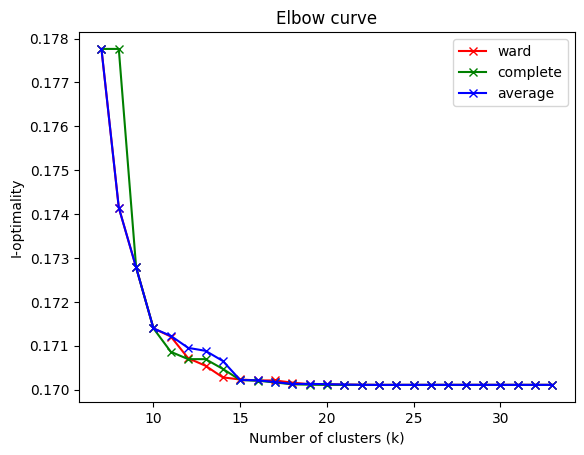

     Method         7         8         9        10        11        12  \
0      ward  0.177763  0.174147  0.172783  0.171395  0.171209  0.170715   
1  complete  0.177763  0.177763  0.172783  0.171395  0.170861  0.170694   
2   average  0.177763  0.174147  0.172783  0.171395  0.171224  0.170951   

         13        14        15  ...        24        25        26        27  \
0  0.170543  0.170278  0.170230  ...  0.170107  0.170107  0.170107  0.170107   
1  0.170694  0.170471  0.170218  ...  0.170107  0.170107  0.170107  0.170107   
2  0.170884  0.170652  0.170218  ...  0.170107  0.170107  0.170107  0.170107   

         28        29        30        31        32        33  
0  0.170107  0.170107  0.170107  0.170107  0.170107  0.170107  
1  0.170107  0.170107  0.170107  0.170107  0.170107  0.170107  
2  0.170107  0.170107  0.170107  0.170107  0.170107  0.170107  

[3 rows x 28 columns]


In [ ]:
h_clust.get_elbow_curve(beta,3)

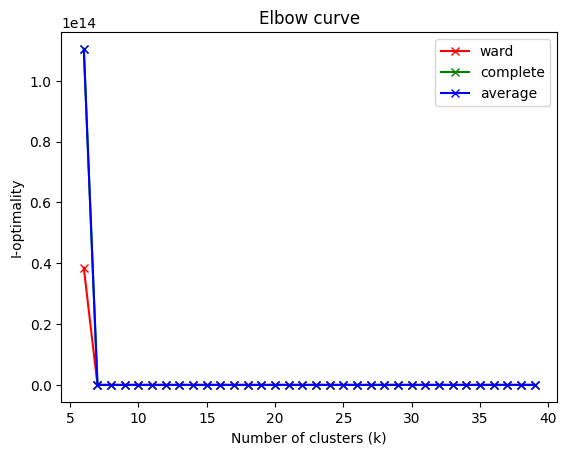

     Method             6       7         8         9        10        11  \
0      ward  3.847463e+13  0.1067  0.106467  0.106349  0.106241  0.106050   
1  complete  1.104970e+14  0.1067  0.106583  0.106472  0.106265  0.106079   
2   average  1.104970e+14  0.1067  0.106584  0.106472  0.106258  0.106050   

         12        13        14  ...        30        31        32        33  \
0  0.106046  0.106042  0.106047  ...  0.105995  0.105995  0.105995  0.105995   
1  0.106077  0.106047  0.105998  ...  0.105995  0.105995  0.105995  0.105995   
2  0.106046  0.106013  0.105998  ...  0.105995  0.105995  0.105995  0.105995   

         34        35        36        37        38        39  
0  0.105995  0.105995  0.105995  0.105995  0.105995  0.105995  
1  0.105995  0.105995  0.105995  0.105995  0.105995  0.105995  
2  0.105995  0.105995  0.105995  0.105995  0.105995  0.105995  

[3 rows x 35 columns]


In [ ]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design1,)
beta = coord_exchange1.get_beta()
h_clust.get_elbow_curve(beta,3)

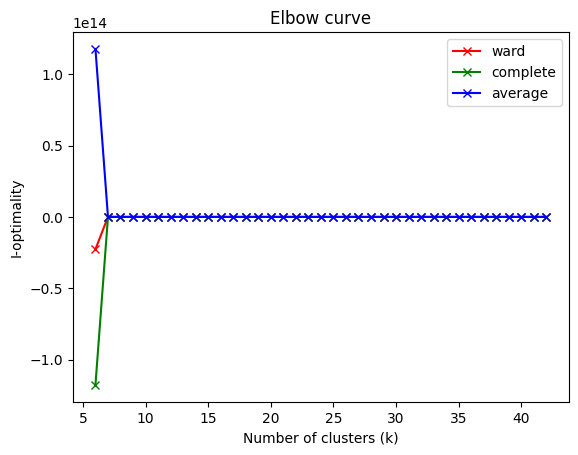

     Method             6         7         8         9        10        11  \
0      ward -2.264109e+13  0.127042  0.126191  0.125037  0.124609  0.124465   
1  complete -1.177786e+14  0.128285  0.126191  0.125681  0.124609  0.124456   
2   average  1.177786e+14  0.127042  0.126191  0.125681  0.124609  0.124429   

         12        13        14  ...        33        34        35        36  \
0  0.124298  0.124189  0.124145  ...  0.124019  0.124018  0.124018  0.124018   
1  0.124263  0.124223  0.124151  ...  0.124019  0.124018  0.124018  0.124018   
2  0.124263  0.124193  0.124097  ...  0.124019  0.124018  0.124018  0.124018   

         37        38        39        40        41        42  
0  0.124018  0.124018  0.124018  0.124018  0.124018  0.124018  
1  0.124018  0.124018  0.124018  0.124018  0.124018  0.124018  
2  0.124018  0.124018  0.124018  0.124018  0.124018  0.124018  

[3 rows x 38 columns]


In [ ]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design2,)
beta = coord_exchange2.get_beta()
h_clust.get_elbow_curve(beta,3)

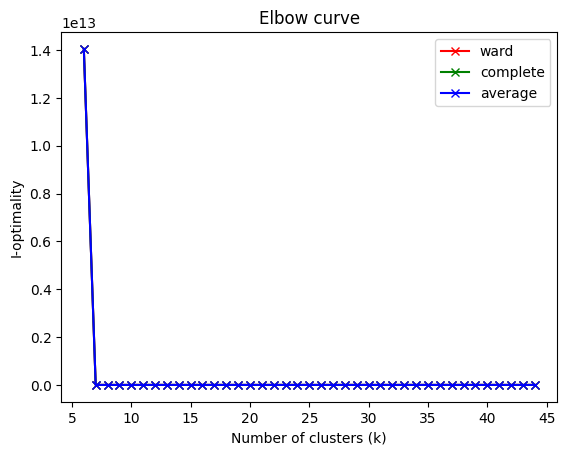

     Method             6         7         8         9        10        11  \
0      ward  1.404529e+13  0.101418  0.101124  0.100923  0.100904  0.100847   
1  complete  1.404529e+13  0.101418  0.101124  0.100923  0.100898  0.100840   
2   average  1.404529e+13  0.101418  0.101124  0.101096  0.100898  0.100840   

         12        13        14  ...        35        36        37        38  \
0  0.100822  0.100799  0.100792  ...  0.100796  0.100796  0.100796  0.100796   
1  0.100834  0.100811  0.100807  ...  0.100796  0.100796  0.100796  0.100796   
2  0.100835  0.100818  0.100795  ...  0.100796  0.100796  0.100796  0.100796   

         39        40        41        42        43        44  
0  0.100796  0.100796  0.100796  0.100796  0.100796  0.100796  
1  0.100796  0.100796  0.100796  0.100796  0.100796  0.100796  
2  0.100796  0.100796  0.100796  0.100796  0.100796  0.100796  

[3 rows x 40 columns]


In [ ]:
h_clust = MixtureOptDesign.HierarchicalCluster(optimal_design3,)
beta = coord_exchange3.get_beta()
h_clust.get_elbow_curve(beta,3)

In [ ]:
h_clust = MixtureOptDesign.HierarchicalCluster(design,)

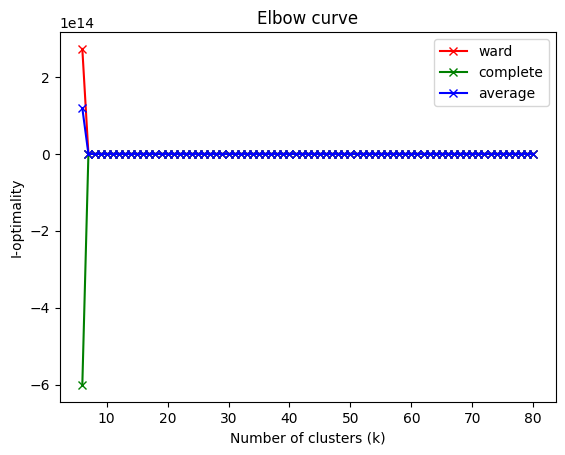

     Method             6          7          8          9         10  \
0      ward  2.730037e+14  13.698927  11.375353   8.499839   8.597390   
1  complete -6.010296e+14  22.491934  14.588866  16.295150  16.507356   
2   average  1.188238e+14  16.606356  11.416089  11.362204  10.404619   

          11         12         13        14  ...        71        72  \
0   9.651221   9.298319   8.018786  8.105062  ...  5.610934  5.617175   
1   8.471189   8.569600   8.693507  7.824775  ...  5.610934  5.617175   
2  11.004617  11.087419  10.124708  8.908843  ...  5.610934  5.617175   

         73        74        75       76        77        78        79  \
0  5.614938  5.614173  5.611984  5.61183  5.606053  5.606057  5.606057   
1  5.614938  5.614173  5.611984  5.61183  5.606053  5.606057  5.606057   
2  5.614938  5.612750  5.611984  5.61183  5.606053  5.606057  5.606057   

         80  
0  5.606057  
1  5.606057  
2  5.606057  

[3 rows x 76 columns]


In [ ]:
h_clust.get_elbow_curve(beta,3)

In [ ]:
beta = np.array((0.86, 0.21, 3.07, 2.34, 3.24, -20.59))

In [ ]:
id_matrix = np.identity(7)
sigma_matrix = MixtureOptDesign.transform_varcov_matrix(id_matrix,3)

In [ ]:
Sigma_prime = MixtureOptDesign.transform_varcov_matrix(id_matrix,3)
Sigma_prime

array([[2., 1., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
draws = MixtureOptDesign.CreateHaltonDraws(beta,sigma_matrix,128)
draws = draws.generate_draws()
draws.shape

(128, 6)

In [ ]:
np.cov(draws.T)

array([[ 1.98067618,  0.90074196, -0.02668339, -0.00867566, -0.02727861,
        -0.04356336],
       [ 0.90074196,  1.85572306, -0.03910241, -0.06226417, -0.04581626,
        -0.03397161],
       [-0.02668339, -0.03910241,  1.00334998, -0.02436339, -0.02556245,
        -0.00473482],
       [-0.00867566, -0.06226417, -0.02436339,  0.97310663, -0.02585229,
        -0.03732686],
       [-0.02727861, -0.04581626, -0.02556245, -0.02585229,  0.97254625,
        -0.04516292],
       [-0.04356336, -0.03397161, -0.00473482, -0.03732686, -0.04516292,
         0.9247679 ]])

In [ ]:
draw_q = MixtureOptDesign.QMCHaltonDraws(beta,sigma_matrix,128)

In [ ]:
draw_q = draw_q.generate_draws()

In [ ]:
np.cov(draw_q.T)

array([[ 2.00669974e+00,  9.56809325e-01, -1.79580255e-02,
         2.19036143e-02, -6.06692454e-03,  3.10226698e-03],
       [ 9.56809325e-01,  1.91963950e+00, -6.04643016e-02,
         3.90742825e-02, -9.12212306e-03, -5.96498980e-02],
       [-1.79580255e-02, -6.04643016e-02,  9.95072447e-01,
        -5.86776952e-02, -2.79625699e-02,  7.50819184e-05],
       [ 2.19036143e-02,  3.90742825e-02, -5.86776952e-02,
         1.00560007e+00, -3.28480061e-02, -4.72865691e-02],
       [-6.06692454e-03, -9.12212306e-03, -2.79625699e-02,
        -3.28480061e-02,  9.99645587e-01,  1.73026990e-03],
       [ 3.10226698e-03, -5.96498980e-02,  7.50819184e-05,
        -4.72865691e-02,  1.73026990e-03,  9.87407845e-01]])

In [ ]:
from MixtureOptDesign.data.csv_util import read_csv_file
from MixtureOptDesign.data.csv_util import write_csv_file

In [ ]:
design = read_csv_file("Tests/data/design_03.csv")
beta = np.array( (1.36, 1.57, 2.47, -0.43, 0.50, 1.09))
I_opt_value = MixtureOptDesign.get_i_optimality_mnl(design,3,beta)

In [ ]:
design.shape

(3, 2, 16)

In [ ]:
design = design.reshape(3,1,32)


In [ ]:
design

array([[[0.  , 0.5 , 0.48, 0.55, 0.45, 0.  , 0.  , 0.51, 1.  , 0.  ,
         1.  , 0.35, 0.  , 0.  , 0.36, 0.  , 0.36, 0.3 , 0.32, 1.  ,
         0.  , 0.  , 0.51, 0.  , 0.5 , 0.44, 0.5 , 1.  , 0.  , 0.29,
         0.  , 0.  ]],

       [[0.5 , 0.  , 0.52, 0.  , 0.  , 0.47, 1.  , 0.49, 0.  , 0.4 ,
         0.  , 0.32, 0.48, 1.  , 0.32, 0.47, 0.32, 0.38, 0.33, 0.  ,
         0.  , 0.  , 0.49, 1.  , 0.5 , 0.  , 0.5 , 0.  , 1.  , 0.38,
         0.5 , 0.  ]],

       [[0.5 , 0.5 , 0.  , 0.45, 0.55, 0.53, 0.  , 0.  , 0.  , 0.6 ,
         0.  , 0.32, 0.52, 0.  , 0.32, 0.53, 0.32, 0.33, 0.35, 0.  ,
         1.  , 1.  , 0.  , 0.  , 0.  , 0.56, 0.  , 0.  , 0.  , 0.33,
         0.5 , 1.  ]]])

In [ ]:
np.unique(design,axis=2).shape

(3, 1, 19)

In [ ]:
np.all(design == np.array([0.5, 0.5, 0]).reshape(3,1,1), axis=0)

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False,  True,
        False, False, False, False, False]])

In [ ]:
 np.array([0.5, 0.5, 0]).reshape(1,1,3)

array([[[0.5, 0.5, 0. ]]])

In [ ]:
indices = np.where(np.all(design == np.array([0.5, 0.5, 0]).reshape(3,1,1), axis=0))

In [ ]:
indices[0]

array([1, 1], dtype=int64)

In [ ]:
subset =design[:,indices[0],indices[1]]

In [ ]:
subset

array([[0.5, 0.5],
       [0.5, 0.5],
       [0. , 0. ]])

In [ ]:
subset = np.zeros(subset.shape) + np.array([1,4,5]).reshape(3,1,1)


print(subset)

[[[1. 1.]]

 [[4. 4.]]

 [[5. 5.]]]


In [ ]:
subset = design[:, :, [24, 26]]
design[:, :, [24, 26]] = np.ones(subset.shape) * np.array([2, 5, 3])
print(subset)


ValueError: operands could not be broadcast together with shapes (3,1,2) (3,) 

In [ ]:
design = read_csv_file("Tests/data/design_04.csv")
        
beta = np.array((0.86, 0.21, 3.07, 2.34, 3.24, -20.59))
I_opt_value = MixtureOptDesign.get_i_optimality_mnl(design,3,beta)

In [ ]:
h_clust = MixtureOptDesign.HierarchicalCluster(design)

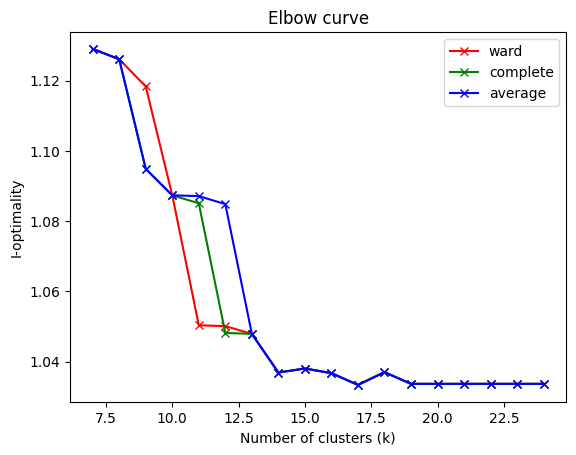

     Method         7       8         9       10        11        12  \
0      ward  1.129044  1.1261  1.118349  1.08736  1.050346  1.050097   
1  complete  1.129044  1.1261  1.094877  1.08736  1.085087  1.048159   
2   average  1.129044  1.1261  1.094877  1.08736  1.087128  1.084848   

         13        14        15        16        17        18       19  \
0  1.047903  1.036886  1.038028  1.036712  1.033359  1.036994  1.03366   
1  1.047903  1.036886  1.038028  1.036712  1.033359  1.036994  1.03366   
2  1.047903  1.036886  1.038028  1.036712  1.033359  1.036994  1.03366   

        20       21       22       23       24  
0  1.03366  1.03366  1.03366  1.03366  1.03366  
1  1.03366  1.03366  1.03366  1.03366  1.03366  
2  1.03366  1.03366  1.03366  1.03366  1.03366  


In [ ]:
h_clust.get_elbow_curve(beta,3)

In [ ]:
k_clust = MixtureOptDesign.KMeansCluster(design)

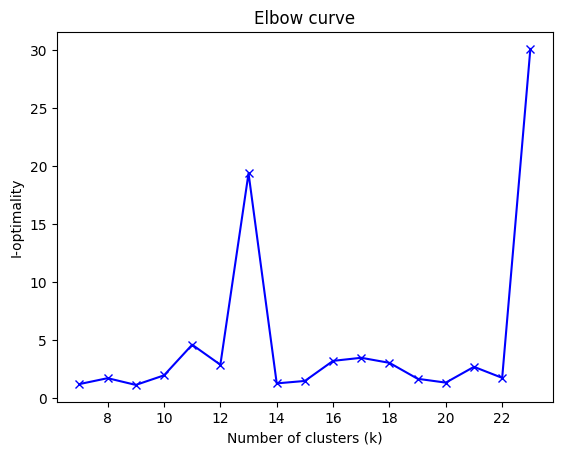

In [ ]:
k_clust.get_elbow_curve(beta,3)

In [ ]:
k_clust.design

<bound method Cluster.design of <MixtureOptDesign.Clustering.hierarchical_clustering.KMeansCluster object at 0x00000297B4638E80>>

In [ ]:
import matplotlib.pyplot as plt

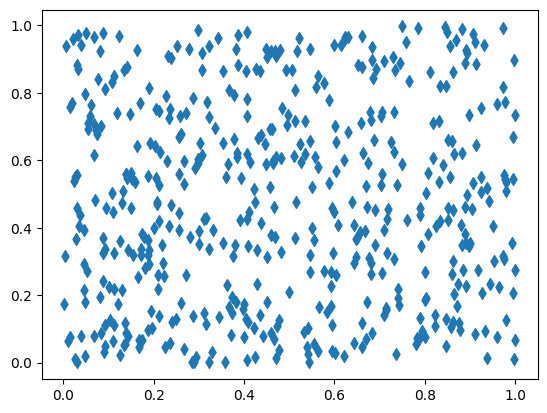

In [ ]:
n = 500
x1 = np.random.uniform(0,1,int(n))
x2 = np.random.uniform(0,1,int(n))

plt.scatter(x1,x2, marker='d')

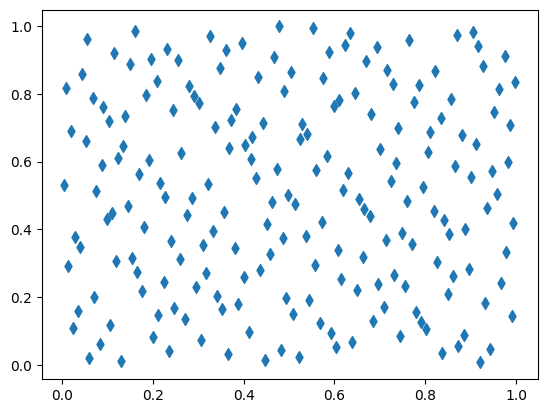

In [ ]:
from scipy.stats import qmc

def halton(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    return sampler.random(n)

def halton_norm(n, d=1):
    sampler = qmc.Halton(d, scramble=True)
    x_halton = sampler.random(n)
    return stats.norm.ppf(x_halton)
    
x = halton(n=200, d=2).T
plt.scatter(x[0],x[1], marker='d')